# **Importing Libraries**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# **Uploading Dataset**

Data Description 

* id - globally-unique time step identifier across an entire file
* breath_id - globally-unique time step for breaths
* R - lung attribute indicating how restricted the airway is (in cmH2O/L/S). Physically, this is the change in pressure per change in flow (air volume per time). Intuitively, one can imagine blowing up a balloon through a straw. We can change R by changing the diameter of the straw, with higher R being harder to blow.
* C - lung attribute indicating how compliant the lung is (in mL/cmH2O). Physically, this is the change in volume per change in pressure. Intuitively, one can imagine the same balloon example. We can change C by changing the thickness of the balloon’s latex, with higher C having thinner latex and easier to blow.
* time_step - the actual time stamp.
* u_in - the control input for the inspiratory solenoid valve. Ranges from 0 to 100.
* u_out - the control input for the exploratory solenoid valve. Either 0 or 1.
* pressure - the airway pressure measured in the respiratory circuit, measured in cmH2O.




In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [ ]:
df_test.head()

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0


In [ ]:
df_train = df_train.drop('id', axis=1)

In [ ]:
def df_overview(df):
    print('Dataframe overview:\n')
    display(df.head())
    print('--------------------------------------------\nSample:\n')
    display(df.sample(10, random_state=555))
    print('--------------------------------------------\nInfo:\n')
    print(df.info())
    print('--------------------------------------------\nNaN\'s:\n')
    print(df.isna().sum())
    print('--------------------------------------------\nDescribe:\n')
    display(df.describe())
    print('--------------------------------------------\nFeature correlation:\n')
    display(df.corr())

In [ ]:
df_overview(df_train)

Dataframe overview:



,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,20,50,0.000000,0.083334,0,5.837492
1,1,20,50,0.033652,18.383041,0,5.907794
2,1,20,50,0.067514,22.509278,0,7.876254
3,1,20,50,0.101542,22.808822,0,11.742872
4,1,20,50,0.135756,25.355850,0,12.234987


--------------------------------------------
Sample:



,breath_id,R,C,time_step,u_in,u_out,pressure
4518483,94149,50,10,0.100144,3.023038,0,9.211995
5495313,114554,50,10,1.137127,0.000000,1,6.329607
3274892,68163,20,10,0.404521,5.433753,0,29.388710
1426430,29628,50,20,0.964605,9.581468,0,24.959675
4593076,95716,20,50,1.156033,0.000000,1,6.610815
5828127,121376,50,10,1.589455,4.308748,1,7.243535
4733541,98634,5,50,0.714422,0.000000,0,10.547735
4216033,87877,50,50,1.047389,0.000000,1,8.227765
2733013,56897,50,20,1.693041,3.207199,1,6.892024
453237,9391,5,50,1.190098,0.000000,1,8.930786


--------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   breath_id  int64  
 1   R          int64  
 2   C          int64  
 3   time_step  float64
 4   u_in       float64
 5   u_out      int64  
 6   pressure   float64
dtypes: float64(3), int64(4)
memory usage: 322.4 MB
None
--------------------------------------------
NaN's:

breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64
--------------------------------------------
Describe:



,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


--------------------------------------------
Feature correlation:



,breath_id,R,C,time_step,u_in,u_out,pressure
breath_id,1.000000,0.001860,0.007222,-0.000213,-0.002378,-0.000100,-0.002394
R,0.001860,1.000000,-0.096070,-0.014535,-0.148120,-0.007594,0.015976
C,0.007222,-0.096070,1.000000,0.004936,0.151002,0.003720,-0.036727
time_step,-0.000213,-0.014535,0.004936,1.000000,-0.352276,0.839191,-0.524829
u_in,-0.002378,-0.148120,0.151002,-0.352276,1.000000,-0.416985,0.308136
u_out,-0.000100,-0.007594,0.003720,0.839191,-0.416985,1.000000,-0.614910
pressure,-0.002394,0.015976,-0.036727,-0.524829,0.308136,-0.614910,1.000000


In [ ]:
df_overview(df_test)

Dataframe overview:



,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0


--------------------------------------------
Sample:



,id,breath_id,R,C,time_step,u_in,u_out
16067,16068,580,5,50,2.283113,4.901111,1
801174,801175,25178,20,10,1.822457,4.010563,1
968284,968285,30372,50,20,1.405124,0.000000,1
3792336,3792337,118498,50,10,0.534832,0.557828,0
80698,80699,2627,50,10,1.965022,1.340710,1
716275,716276,22433,50,50,1.206079,0.000000,1
2451315,2451316,76578,20,10,1.127353,0.000000,1
500110,500111,15707,20,50,1.021205,0.000000,1
285250,285251,8953,50,10,1.723627,3.507629,1
1576245,1576246,49323,5,50,0.160678,68.758030,0


--------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024000 entries, 0 to 4023999
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
dtypes: float64(2), int64(5)
memory usage: 214.9 MB
None
--------------------------------------------
NaN's:

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
dtype: int64
--------------------------------------------
Describe:



,id,breath_id,R,C,time_step,u_in,u_out
count,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06
mean,2.012000e+06,6.292796e+04,2.710785e+01,2.607038e+01,1.307083e+00,7.338098e+00,6.203864e-01
std,1.161629e+06,3.624924e+04,1.954281e+01,1.717103e+01,7.658902e-01,1.350955e+01,4.852908e-01
min,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.006001e+06,3.153050e+04,5.000000e+00,1.000000e+01,6.428454e-01,4.096735e-01,0.000000e+00
50%,2.012000e+06,6.305750e+04,2.000000e+01,2.000000e+01,1.308083e+00,4.377512e+00,1.000000e+00
75%,3.018000e+06,9.433325e+04,5.000000e+01,5.000000e+01,1.965240e+00,4.983472e+00,1.000000e+00
max,4.024000e+06,1.257480e+05,5.000000e+01,5.000000e+01,2.935203e+00,1.000000e+02,1.000000e+00


--------------------------------------------
Feature correlation:



,id,breath_id,R,C,time_step,u_in,u_out
id,1.000000,0.999998,0.002978,-0.003102,-0.000169,-0.002049,-0.000118
breath_id,0.999998,1.000000,0.002983,-0.003115,-0.000188,-0.002039,-0.000135
R,0.002978,0.002983,1.000000,-0.093566,-0.014633,-0.151597,-0.007784
C,-0.003102,-0.003115,-0.093566,1.000000,0.004931,0.153041,0.003774
time_step,-0.000169,-0.000188,-0.014633,0.004931,1.000000,-0.352357,0.839221
u_in,-0.002049,-0.002039,-0.151597,0.153041,-0.352357,1.000000,-0.417020
u_out,-0.000118,-0.000135,-0.007784,0.003774,0.839221,-0.417020,1.000000


# EDA

In [ ]:
def show_correlogram(df):
    plt.figure(figsize=(6,6), dpi= 80)
    sns.heatmap(
        df.corr(), xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True, cbar=False
    )
    plt.title('Correlogram between features', fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

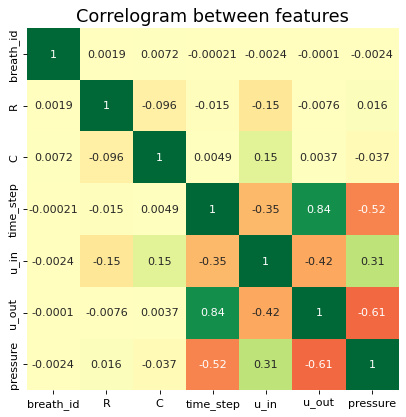

In [ ]:
show_correlogram(df_train)

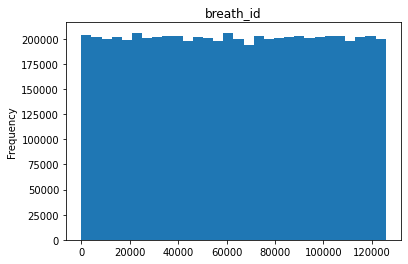

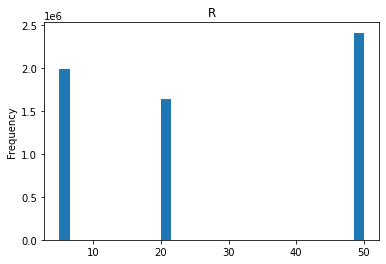

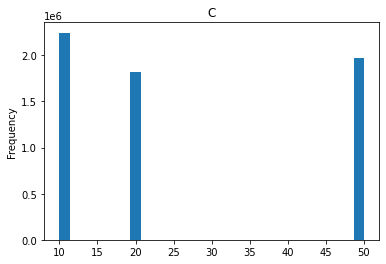

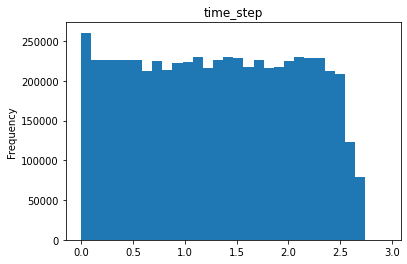

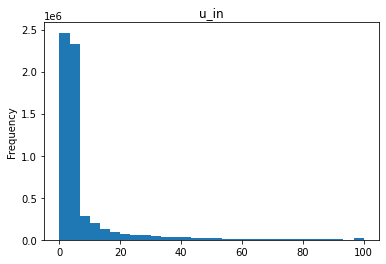

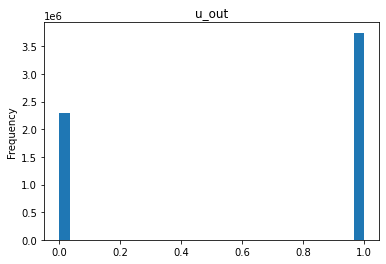

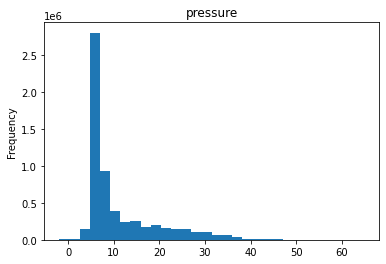

In [ ]:
for col in df_train.columns:
    df_train[col].plot(kind='hist', bins=30, title=col)
    plt.show()

In [ ]:
df_breath = df_train.groupby('breath_id', as_index=False).median()
df_breath

,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,20.0,50.0,1.344639,4.922568,1.0,7.595045
1,2,20.0,20.0,1.343440,4.931040,1.0,6.997477
2,3,50.0,20.0,1.262727,4.885308,1.0,7.384139
3,4,50.0,50.0,1.264113,4.788770,1.0,7.243535
4,5,5.0,50.0,1.361266,4.940690,1.0,7.454441
...,...,...,...,...,...,...,...
75445,125740,50.0,50.0,1.359644,4.405561,1.0,6.540513
75446,125742,20.0,10.0,1.331251,2.980963,1.0,6.821722
75447,125743,20.0,10.0,1.332584,2.572122,1.0,6.399909
75448,125745,50.0,50.0,1.254379,4.886712,1.0,7.384139


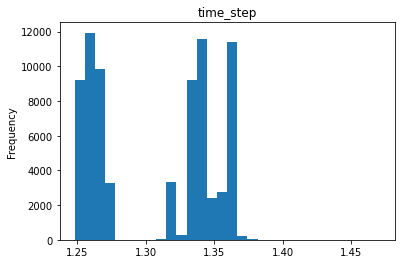

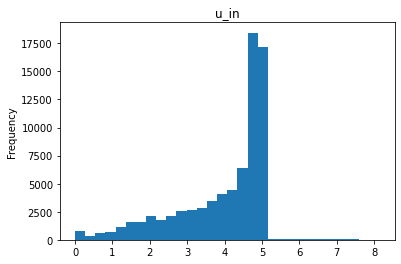

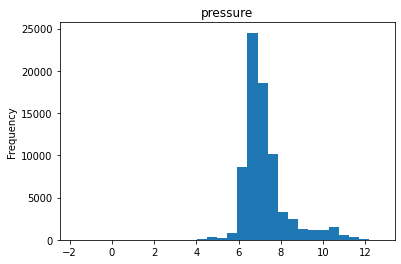

In [ ]:
for col in ['time_step', 'u_in', 'pressure']:
    df_breath[col].plot(kind='hist', bins=30, title=col)
    plt.show()


In [ ]:
print('Some data where pressure is normal:')
display(df_breath[df_breath['pressure'] == df_train['pressure'].median()].sample(3, random_state=1))
print('\nSome data where pressure is below 0:')
display(df_breath[df_breath['pressure'] < 0].sample(3, random_state=1))
print('\nSome data where pressure is high:')
display(df_breath[df_breath['pressure'] > 12].sample(3, random_state=1))

Some data where pressure is normal:


,breath_id,R,C,time_step,u_in,u_out,pressure
29396,48945,20.0,20.0,1.344674,4.566269,1.0,7.032628
16953,28141,50.0,10.0,1.250903,3.628546,1.0,7.032628
65885,109737,50.0,20.0,1.261447,4.482881,1.0,7.032628



Some data where pressure is below 0:


,breath_id,R,C,time_step,u_in,u_out,pressure
58814,98041,50.0,10.0,1.319689,0.821494,1.0,-0.067889
70859,118131,50.0,10.0,1.320606,0.000000,1.0,-1.052119
6760,11216,50.0,10.0,1.320016,0.000000,1.0,-0.419399



Some data where pressure is high:


,breath_id,R,C,time_step,u_in,u_out,pressure
62759,104581,5.0,50.0,1.268750,4.902565,1.0,12.129534
8695,14416,5.0,50.0,1.270595,4.907272,1.0,12.059232
41634,69384,5.0,50.0,1.270216,4.908299,1.0,12.270138


# Modelling

In [ ]:
def add_features(df):
    df['u_in_cumsum'] = df['u_in'].groupby(df['breath_id']).cumsum()
    df['u_in_lag_1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_in_lag_2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_in_lag_3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_in_rolling_mean_3'] = df.groupby('breath_id')['u_in'].shift().rolling(3).mean()
    df['u_in_rolling_mean_5'] = df.groupby('breath_id')['u_in'].shift().rolling(5).mean()
    df['u_in_begin'] = df.groupby('breath_id')['u_in'].transform('first')
    df['u_in_end'] = df.groupby('breath_id')['u_in'].transform('last')
    df['u_in_min'] = df.groupby('breath_id')['u_in'].transform('min')
    df['u_in_max'] = df.groupby('breath_id')['u_in'].transform('max')
    df['u_in_median'] = df.groupby('breath_id')['u_in'].transform('median')
    df = df.fillna(0)
    df = df.drop(['breath_id', 'u_in', 'u_out'], axis=1)
    return df

In [ ]:
X = df_train.copy()
X = X.drop('pressure', axis=1)
X = add_features(X)
y = df_train['pressure']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=555)

In [ ]:
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=15, random_state=555)

In [ ]:
linear_model.fit(X, y)
tree_model.fit(X, y)

DecisionTreeRegressor(max_depth=15, random_state=555)

In [ ]:
def plot_create(x, y):
    plt.plot(x, y, '-', label=y.name)

In [ ]:
def process_visualisation_with_preds(df, df_preds, breath_id):
    plt.figure(figsize=(14, 6))
    plt.title('Breath Id - {}'.format(breath_id))
    plot_create(df[df['breath_id'] == breath_id]['time_step'],
                df[df['breath_id'] == breath_id]['pressure'])
    plot_create(df[df['breath_id'] == breath_id]['time_step'],
                df[df['breath_id'] == breath_id]['u_in'])
    plot_create(df[df['breath_id'] == breath_id]['time_step'],
                df[df['breath_id'] == breath_id]['u_out'])
    plot_create(df[df['breath_id'] == breath_id]['time_step'],
                df_preds)
    plt.grid()
    plt.legend()
    plt.ylabel('Value')
    plt.show()

## Visulaizing Prediction Accuracy for two model

Pressure predictions by Linear Model where pressure is normal:


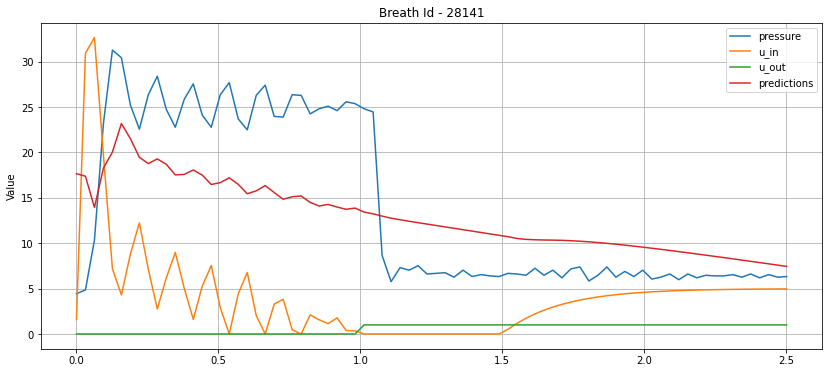

Pressure predictions by Tree Model where pressure in normal:


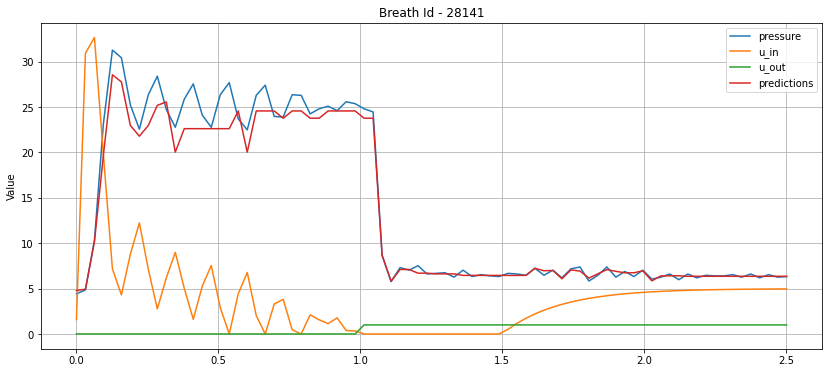

In [ ]:
#Lets check prediction quality with our process visualisation:
X_df_vis = df_train[df_train['breath_id'] == 28141].reset_index()
X_df_vis = add_features(X_df_vis)
X_df_vis = X_df_vis.drop(['index', 'pressure'], axis=1)

print('Pressure predictions by Linear Model where pressure is normal:')
process_visualisation_with_preds(df_train, pd.Series(linear_model.predict(X_df_vis), name='predictions'), 28141)
print('Pressure predictions by Tree Model where pressure in normal:')
process_visualisation_with_preds(df_train, pd.Series(tree_model.predict(X_df_vis), name='predictions'), 28141)

Pressure predictions by Linear Model where pressure is below 0:


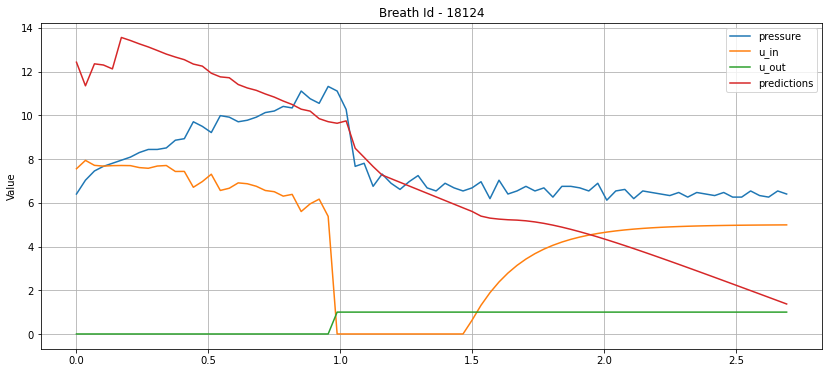

Pressure predictions by Tree Model where pressure in below 0:


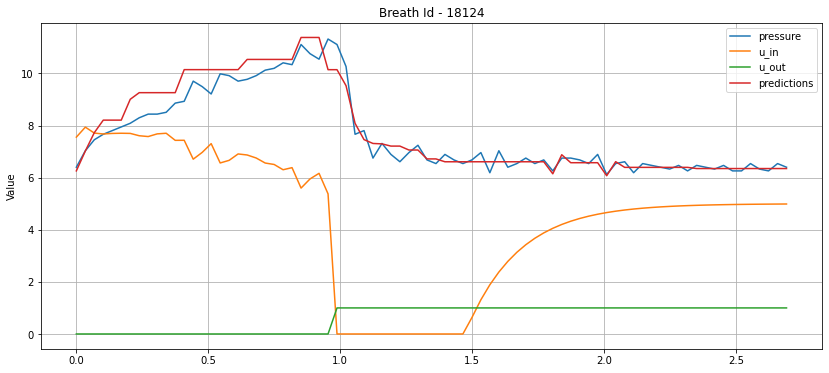

In [ ]:
X_df_vis = df_train[df_train['breath_id'] == 18124].reset_index()
X_df_vis = add_features(X_df_vis)
X_df_vis = X_df_vis.drop(['index', 'pressure'], axis=1)

print('Pressure predictions by Linear Model where pressure is below 0:')
process_visualisation_with_preds(df_train, pd.Series(linear_model.predict(X_df_vis), name='predictions'), 18124	)
print('Pressure predictions by Tree Model where pressure in below 0:')
process_visualisation_with_preds(df_train, pd.Series(tree_model.predict(X_df_vis), name='predictions'), 18124	)

Pressure predictions by Linear Model where pressure is high:


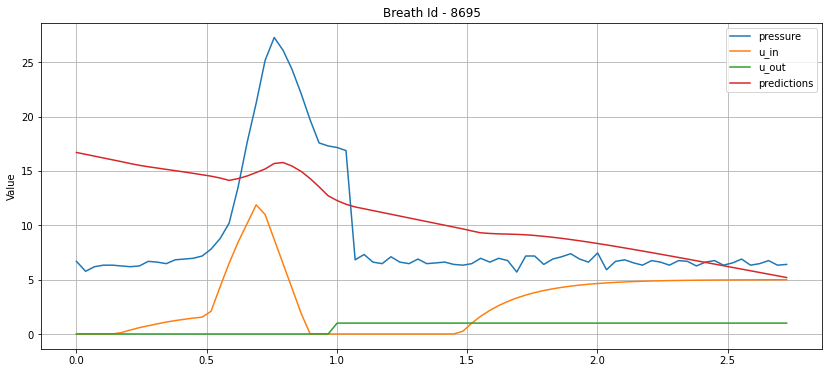

Pressure predictions by Tree Model where pressure in high:


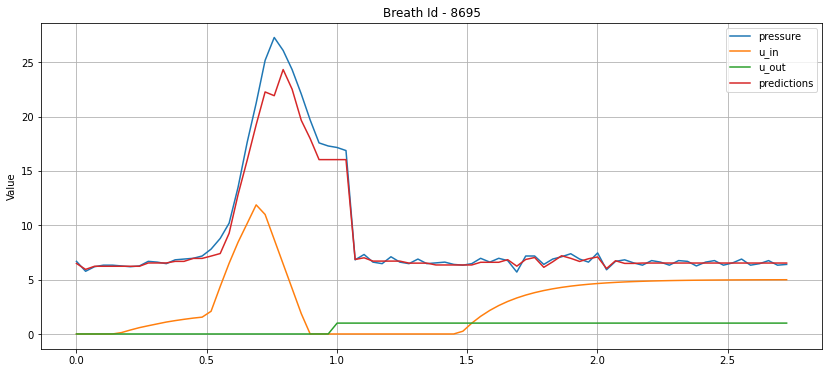

In [ ]:
X_df_vis = df_train[df_train['breath_id'] == 8695].reset_index()
X_df_vis = add_features(X_df_vis)
X_df_vis = X_df_vis.drop(['index', 'pressure'], axis=1)

print('Pressure predictions by Linear Model where pressure is high:')
process_visualisation_with_preds(df_train, pd.Series(linear_model.predict(X_df_vis), name='predictions'), 8695)
print('Pressure predictions by Tree Model where pressure in high:')
process_visualisation_with_preds(df_train, pd.Series(tree_model.predict(X_df_vis), name='predictions'), 8695)

## Calculating Mean Absolute Error

In [ ]:
def train_and_score(model):
    model.fit(X_train, y_train)
    return mean_absolute_error(y_valid, model.predict(X_valid))

In [ ]:
display(
    pd.DataFrame(data=([train_and_score(linear_model)],
                       [train_and_score(tree_model)],
                      ),
                 columns=['Result MAE'],
                 index=['Linear', 'Tree'])
)

,Result MAE
Linear,3.943032
Tree,0.528356
